<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Linear%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
# Load in the data
data = load_breast_cancer()

In [4]:
# Check the type of 'data'
type(data)

sklearn.utils.Bunch

In [5]:
# Bunch is like dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' is the input data
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.target.shape

(569,)

In [10]:
# Feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# Get train_test_split import
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [15]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Building the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D, )),
  tf.keras.layers.Dense(1, activation="sigmoid")                                    
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6353 - accuracy: 0.6903 - val_loss: 0.5412 - val_accuracy: 0.7872
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7244 - val_loss: 0.5010 - val_accuracy: 0.7926
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7480 - val_loss: 0.4657 - val_accuracy: 0.8191
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5108 - accuracy: 0.7743 - val_loss: 0.4351 - val_accuracy: 0.8298
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.8005 - val_loss: 0.4073 - val_accuracy: 0.8511
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4483 - accuracy: 0.8241 - val_loss: 0.3839 - val_accuracy: 0.8617
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8346 - val_loss: 0.3626 - val_accuracy: 0.8723
Epoch 8/100
1

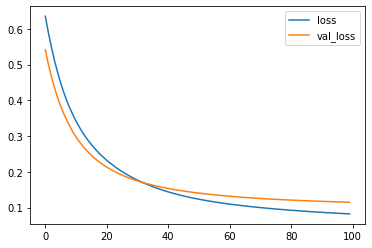

In [18]:
# Plot whats returned by 'fit'
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

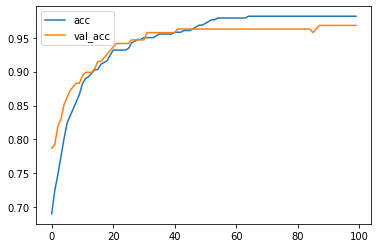

In [19]:
# Plot accuracy as well
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()